In [202]:
import numpy as np
from batchflow.opensets import MNIST
from batchflow import dataset, B, V, R, P
from batch import MyBatch
import matplotlib.pyplot as plt
import importlib
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [203]:
dataset = MNIST(batch_class=MyBatch)

ExtractingDownloading http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Extracting /tmp/train-labels-idx1-ubyte.gz
/tmp/train-images-idx3-ubyte.gz
Extracting /tmp/t10k-images-idx3-ubyte.gz
Extracting /tmp/t10k-labels-idx1-ubyte.gz


In [204]:
%autoreload 2
train_pipeline =  (dataset.train.p
                        .resize((66,66))
                        .rotate(angle=P(R('uniform', -35, 35)))
                        .scale(factor=P(R('uniform', 0.6, 1.4)), preserve_shape=True, origin='center')
                        .invert(p=0.5)
                        .custom_noise())

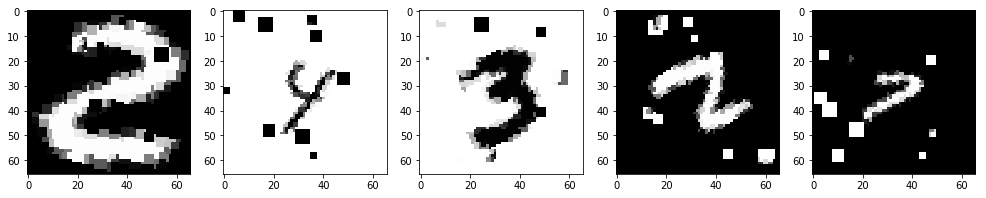

In [210]:
batch = train_pipeline.next_batch(5)

fig, ax = plt.subplots(1, 5, figsize=(17, 17))
for i, axis in enumerate(ax):
    axis.imshow(batch.images[i])